In [11]:
from dataset import SizeDataset
from torch.utils.data import DataLoader
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cfg = yaml.safe_load(open('../configs/ant_size.yaml'))
dataset_instance = SizeDataset(cfg, "train")

In [3]:
print(dataset_instance.data_root)

/Users/nsi/Documents/ant-size/data


In [7]:
dataloader = DataLoader(
    dataset_instance, 
    batch_size=16, 
    shuffle=True, 
    num_workers=1
)

In [13]:
datas, labels = next(iter(dataloader))
batch = list(zip(datas, labels))

# Grab the first (data, label) pair from the zipped list
example = batch[0]
data, label = example

In [10]:
labels

tensor([2, 1, 1, 2, 1, 1, 3, 0, 1, 2, 2, 1, 2, 1, 1, 2])

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Checking out dataset:
(3, 224, 224)
float32
0.43529412
1.0
tensor(2)


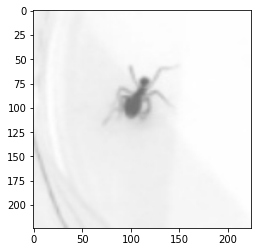

In [14]:
data_np = data.numpy()
print('Checking out dataset:')
print(data_np.shape)
print(data_np.dtype)
print(np.min(data_np))
print(np.max(data_np))
print(label)

# Transpose C,W,H to W,H,C for OpenCV
data_np = np.transpose(data_np, (1, 2, 0))

# Convert range from [0.0, 1.0] to [0, 255]
data_np = data_np * 255.0

# Round to nearest whole number
data_np = np.around(data_np)

# Truncate negative numbers
data_np[data_np < 0] = 0

# Truncate out-of-bounds numbers
data_np[data_np > 255] = 255

# Convert from existing np.float32 to np.uint8 (unsigned 8-bit integer)
data_np = data_np.astype(np.uint8)

plt.imshow(data_np)

